(0, 366)

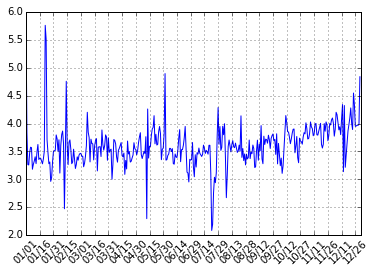

In [46]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

data = []

with open('../emotion_day', 'r') as f:
    for line in f:
        date, emotion = line.split()
        emotion = float(emotion)
        data.append((date, emotion))

data = sorted(data)
dates, emotions = zip(*data)

plt.plot(emotions)
plt.grid(True)
x = range(0, len(dates), 15)
_ = plt.xticks(x, [dates[i] for i in x], rotation=45)
plt.xlim([0, len(data)])

# plt.savefig('emotion_day', dpi=600)

(0, 366)

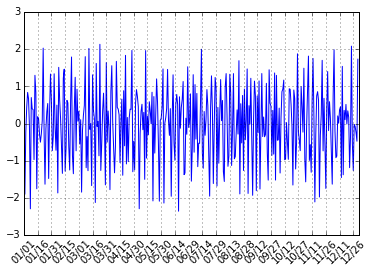

In [47]:
emotions = [0] + [emotions[i] - emotions[i - 1] for i in range(1, len(emotions))]
emotions_z = [ (emotions[i] - np.average(emotions[max(0, i - 3): min(len(emotions), i + 4)])) / np.std(emotions[max(0, i - 3): min(len(emotions), i + 4)]) for i in range(len(emotions))]

plt.plot(emotions_z)
plt.grid(True)
x = range(0, len(dates), 15)
_ = plt.xticks(x, [dates[i] for i in x], rotation=45)
plt.xlim([0, len(data)])

(0, 243)

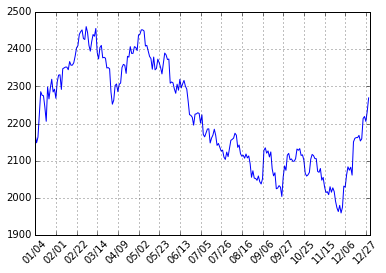

In [48]:
data = []

with open('../stock', 'r') as f:
    for line in f:
        date, price = line.split()
        price = float(price)
        data.append((date, price))

data = sorted(data)
dates_stock, prices = zip(*data)

plt.plot(prices)
plt.grid(True)
x = range(0, len(dates_stock), 15)
_ = plt.xticks(x, [dates_stock[i] for i in x], rotation=45)
plt.xlim([0, len(data)])

# plt.savefig('emotion_price', dpi=600)

(0, 243)

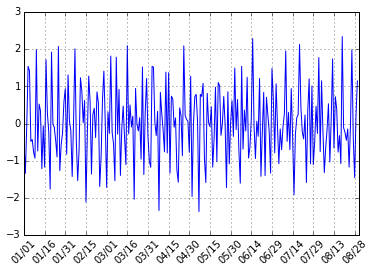

In [49]:
prices = [0] + [prices[i] - prices[i - 1] for i in range(1, len(prices))]
prices_z = [ (prices[i] - np.average(prices[max(0, i - 3): min(len(prices), i + 4)])) / np.std(prices[max(0, i - 3): min(len(prices), i + 4)]) for i in range(len(prices))]

plt.plot(prices_z)
plt.grid(True)
x = range(0, len(dates), 15)
_ = plt.xticks(x, [dates[i] for i in x], rotation=45)
plt.xlim([0, len(data)])

In [50]:
idxs = [i for i in range(len(dates)) if dates[i] in dates_stock]
f = lambda arr, idxs: [arr[i] for i in idxs]
dates = f(dates, idxs)
emotions = f(emotions, idxs)
emotions_z = f(emotions_z, idxs)

(0, 243)

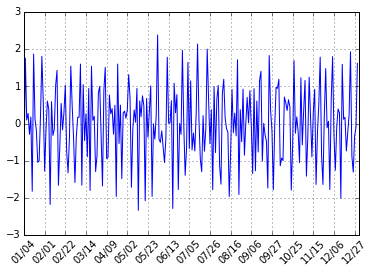

In [51]:
emotions_z = [ (emotions[i] - np.average(emotions[max(0, i - 3): min(len(emotions), i + 4)])) / np.std(emotions[max(0, i - 3): min(len(emotions), i + 4)]) for i in range(len(emotions))]

plt.plot(emotions_z)
plt.grid(True)
x = range(0, len(dates), 15)
_ = plt.xticks(x, [dates[i] for i in x], rotation=45)
plt.xlim([0, len(data)])

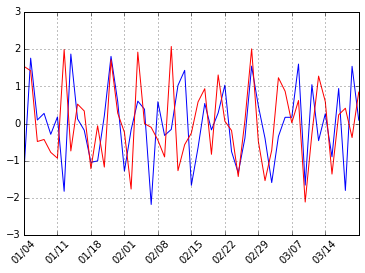

In [71]:
month_s = 1
month_e = 2

_1 = emotions_z[(month_s - 1) * 30 : month_e * 30]
_2 = prices_z[(month_s - 1) * 30 : month_e * 30]
_3 = dates[(month_s - 1) * 30 : month_e * 30]

plt.plot(_1, 'b')
plt.plot(_2[3:], 'r')

plt.grid(True)
x = range(0, len(_3) - 10, 5)
_ = plt.xticks(x, [_3[i] for i in x], rotation=45)
plt.xlim([0, len(_3) - 10])

plt.savefig('emotion_price_offset3', dpi=600)

In [70]:
# import statsmodels.api as sm

# __1 = emotions[(month_s - 1) * 30 : month_e * 30]
# __2 = prices[(month_s - 1) * 30 : month_e * 30]
# x = np.array(zip(__1, __2))

# print sm.tsa.stattools.grangercausalitytests(x, 3)